# Introducción a la regresión con red neuronal en tensorflow

Se puede definir un problema de regresión como: predecir una variable numérica basado en otras combinaciones de variables para predecir un número.

Link al repositorio del curso [Repositorio de GitHub](https://github.com/mrdbourke/tensorflow-deep-learning)

In [ ]:
# Importar Tensorflow
import tensorflow as tf
tf.__version__

'2.9.1'

## crear datos para ver y ajustar 

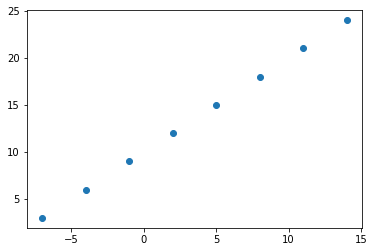

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Crear Propiedades
X = np.arange(start=-7, stop=15, step=3, dtype=np.float64)

# Crear etiquetas o labels
y = np.arange(start=3, stop=25, step=3, dtype=np.float64)

plt.scatter(X, y)
plt.show()

In [ ]:
y

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [ ]:
X+10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

## input and output shapes

In [ ]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
# Convertir nuestro array de Numpy en un tensor
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape


(TensorShape([]), TensorShape([]))

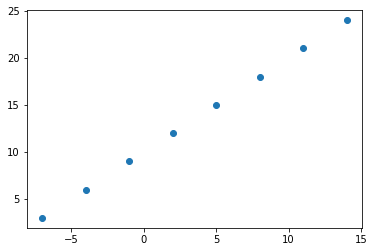

In [ ]:
plt.scatter(X, y)

## Pasos para modelar con Tensorflow
1. **Crear un modelo**: Defina las capas `layers` de entrada `input` y salida `output`, así como las capas ocultas `hidden layers` de un modelo de aprendizaje profundo `deep learning`.
2. **Compilar un modelo**: Definir la función de pérdida `loss function` (en otras palabras, la función que le dice a nuestro modelo cómo mejorar los patrones su aprendizaje) y las métricas de evaluación (lo que podemos usar para interpretar el rendimiento de nuestro modelo)
3. **Ajustar el modelo o** `Fitting the model`: Dejar que el modelo encuentre patrones entre X & y (features and labels)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Crear el modelo usando la api Sequential
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compilar el modelo
model.compile(
    loss=tf.keras.losses.mae, # mae significa mean absolute error
    optimizer=tf.keras.optimizers.SGD(), # SGD significa stochastic gradient descent 
    metrics=["mae"]
    )

# 3. Fit the model o ajustar el modelo 
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 349ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Vamos a checar X & y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Vamos a intentar hacer una predicción usando nuestro modelo
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 92ms/step


array([[12.716021]], dtype=float32)

In [ ]:
y_pred+11

array([[23.71602]], dtype=float32)

## Mejorar nuestro modelo
Podemos mejorar nuestro modelo alterando los pasos que tomamos para crear su modelo.

1. **Crear el model: ** - En este apartado podemos añadir más capas o `layers`, 

In [ ]:
# vamos a recrear nuestro modelo

# 1. Crear el modelo
model = tf.keras.Sequential([
    # tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compliar nuestro modelo
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 220ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 3m

In [ ]:
# Remaind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Vamos aa comprobar si nuestro modelo mejoró
model.predict([17.0])

1/1 [==============================] - 0s 67ms/step


array([[29.739855]], dtype=float32)

In [ ]:
model = tf.keras.Sequential([
    # tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss="mae",
    # optimizer=tf.keras.optimizers.SGD(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 488ms/step - loss: 11.7682 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 11.0963 - accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 10.4150 - accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 9.7212 - accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 9.0104 - accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 8.2778 - accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 7.5198 - accuracy: 0.0000e+00
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 6.9648 - accuracy: 0.0000e+00
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 7.0672 - accuracy: 0.0000e+00
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 7.3315 - accur

In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 85ms/step


array([[26.583532]], dtype=float32)

Formas comunes de mejorar nuestro modelo
- Añadirle más layers o capas
- aumentar el número de unidades ocultas ó number of hidden units
- cambiar la función de activación o activation function
- Cambiar la función de optimización o optimization function
- Cambiar la taza de aprendizaje ó learning rate
    - El learning rate es el porcentaje de cambio con el que se actualizan los pesos en cada iteración, cada vez que se realiza una iterazión en el proceso de entrenamiento se deben de actualizar los pesos de la entrada para poder dar cada vez una mejor aproximación. 
    este trabajo de calcular error de los pesos se puede hacer con el algoritmo `SGD`, y en cada iteración calcula un nuevo valor para los pesos. Sin embargo, el hecho de poner los valores tal cual los obtiene puede ser perjudicial, podría equivocarse o pasarse demasiado en una iteración, por lo que se define un porcentaje de este nuevo valor, **learning rate**.
    **El learning rate nos dice que tanto actualizamos los pesos en cada iteración, en un rango de 0 a1**

    **Como podemos ver el learning rate es uno de los parámetros dek modelo que pueden afectar mayormente al comportamiento del modelo**
- Añadir más información ó Fitting on more data
- Fiting for longer increase the number of epochs

## Evaluar nuestro modelo
 En la práctica, una forma de trabajao que se lleva a cabo cuando creamos redes neuronales esÑ

 ```
 build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
 ```

Cuando debemos de evaluar nuestro modelo hay 3 palabras que debemos de memorizar
> Visualizar, Visualizar, visualizar

Es una buena idea visualizar:
- los datos - con que tipo de datos estamos trabajando? Como se ven los datos
- Como es el modelo en si mismo - como luce nuestro modelo?
- El entrenamiento de nuestro modelo - como se comporta un modelo mientras aprende
- Las predicciones del modelo - Como hace las predicciones de una linea del modelo a comparación de las etiquetas originales?

In [ ]:
# Crear un dataset más grande
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [ ]:
# Hacer las etiquetas para el conjunto de datos
y = X +10
y = list(y)

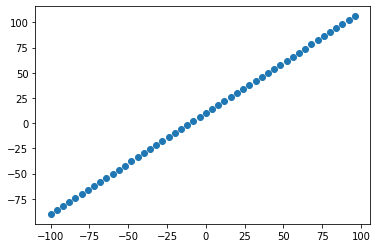

In [ ]:
# Visualizar los datos
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.show()

### Los 3 conjuntos

- **El conjunto de entrenamiento** - El modelo aprende de los datos, lo que es normalmente del 70-80% del total de los datos que se tienen disponibles
- **El conjunto de validación** - El modelo se ajusta a estos datos, que suelen ser del 10 al 15 % de los datos disponibles.
- **Conjunto de prueba** - el modelo se evalúa con estos datos para probar lo que se ha aprendido, este conjunto suele ser del 10 al 15% del total de datos disponibles

In [ ]:
# Obtener el numero de datos de nuestro modelo
len(X), X.shape

(50, (50,))

Para este ejemplo usaremos la librería de `sklearn` para crear nuestras variables

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizar nuestros datos



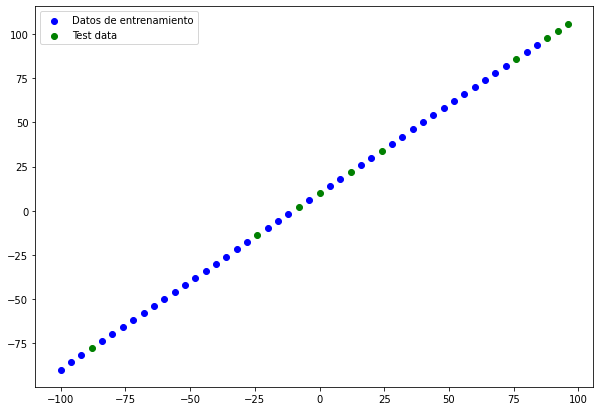

In [ ]:
plt.figure(figsize=(10, 7))
# graficar el entrenamiento en color azul
plt.scatter(X_train, y_train, c="b", label="Datos de entrenamiento")
# Graficar los datos de testeo en verde
plt.scatter(X_test, y_test, c="g", label="Test data")
plt.legend();

In [ ]:
# Ahora vamos a darle un vistazo a como crear nua red neuronal para nustros datos

# 1. Primero debemos de crear un modelo

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compilar el modelo
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# fit the model
# model.fit(X_train, y_train, epochs=100)

In [ ]:
tf.random.set_seed(43)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]),
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total-params: Numero total de parametros en el modelo
* Trainable parameters: estos son los parámetros (patterns o patrones) que el modelo pude actualizar mientraas está entrenando
* Non-trainable params: estos parametros no se pueden actualizar durante el entrenamiento (esto es típico cuando traes patrones o parametros pre entrenados de otro modelo durante **transfer learning**)

**Recurso: ** para conocer mas sobre los tipos de parámetros en una capa o layer ver el video de mit introduction to deep learning [video](http://introtodeeplearning.com/)

In [ ]:
# fit the model
model.fit(X_train, np.array(y_train), epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 83.3273 - mae: 83.3273
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 34.9522 - mae: 34.9522
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 12.1685 - mae: 12.1685
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 9.9188 - mae: 9.9188
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 14.7312 - mae: 14.7312
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 16.7288 - mae: 16.7288
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 9.4128 - mae: 9.4128
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 18.1217 - mae: 18.1217
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 9.9520 - mae: 9.9520
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 21.3751 - mae: 21.3751
Epoch 11/100
2/2 [==============================] - 0s 2ms/step -

In [ ]:
# obtener el `Summary` de nustro modelo
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2869a320-b9f1-4921-b902-9f4d298235ae' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>